# Tujuan
Pada latihan kali ini, Anda akan belajar membuat model unsupervised learning dengan teknik K-Means Clustering.

## Tahapan Latihan
Tahapan pada latihan kali ini adalah sebagai berikut:

1. Konversi data menjadi Dataframe.
2. Lakukan preprocessing data.
3. Hilangkan kolom 'CustomerID' dan 'gender'.
4. Latih model K-Means.
5. Buat plot untuk Elbow dan Cluster.

In [1]:
import pandas as pd

# ubah file csv ke datafram
df = pd.read_csv("Mall_Customers.csv")

# tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [2]:
# ubah nama kolom
df = df.rename(columns={'Gender':'gender'	,'Age':'age'	,'Annual Income (k$)':'annual_income',	'Spending Score (1-100)': 'spending_score'})

# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female','Male'],[0,1], inplace=True)

# tampilkan data yang sudah di preprocess
df.head(10)

/tmp/ipykernel_80642/832193497.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace(['Female','Male'],[0,1], inplace=True)
/tmp/ipykernel_80642/832193497.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace(['Female','Male'],[0,1], inplace=True)


,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [3]:
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID','gender'], axis=1)


# membuat list yang berisi inertia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
clusters


[308812.78,
 212840.1698209719,
 154578.69843995018,
 105251.10813220503,
 79276.7490465984,
 58302.40630860368,
 51153.283015839996,
 47430.48456053929,
 49198.87903069155,
 37486.13743029104]

Text(0, 0.5, 'Inertia')

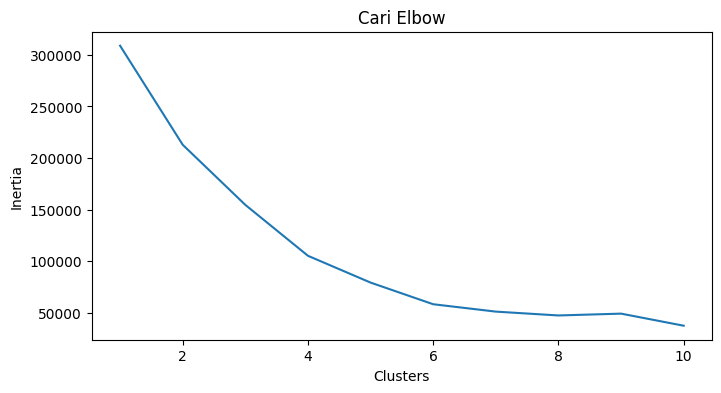

In [4]:
# membuat plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia")

/tmp/ipykernel_80642/3871574256.py:9: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'], palette=sns.color_palette('hls',5))


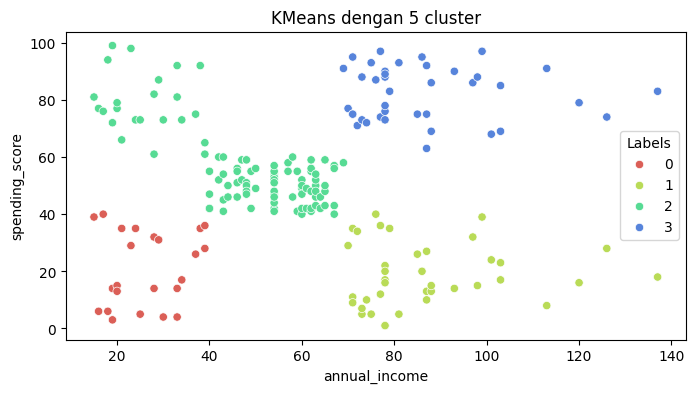

In [5]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'], palette=sns.color_palette('hls',5))
plt.title('KMeans dengan 5 cluster')
plt.show()